In [1]:
# Libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

In [2]:
# Loading the data
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
def answer_one():
    # Features
    X = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])
    # Target variable
    y = pd.Series(cancer["target"], name = "target")

    return pd.concat([X, y], axis = 1)      # full dataframe

In [4]:
df = answer_one()
df.shape

(569, 31)

In [5]:
def answer_two():
    cancerdf = answer_one()
    # Values distribution
    class_dist = cancerdf['target'].value_counts()
    # Renaming index
    class_dist.index = ["maignant", "benign"]
    
    return class_dist

In [6]:
answer_two()

maignant    357
benign      212
Name: target, dtype: int64

In [7]:
def answer_three():
    cancerdf = answer_one()

    # Independent variables
    X = cancerdf.drop("target", axis = 1)

    # Target variable
    y = cancerdf["target"]

    return X, y

In [8]:
answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [9]:
def answer_four():
    X, y = answer_three()

    # Data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

    return X_train, X_test, y_train, y_test

In [10]:
answer_four()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 293       11.850         17.46           75.54      432.7          0.08372   
 332       11.220         19.86           71.94      387.3          0.10540   
 565       20.130         28.25          131.20     1261.0          0.09780   
 278       13.590         17.84           86.24      572.3          0.07948   
 489       16.690         20.20          107.10      857.6          0.07497   
 ..           ...           ...             ...        ...              ...   
 277       18.810         19.98          120.90     1102.0          0.08923   
 9         12.460         24.04           83.97      475.9          0.11860   
 359        9.436         18.32           59.82      278.6          0.10090   
 192        9.720         18.22           60.73      288.1          0.06950   
 559       11.510         23.93           74.52      403.5          0.09261   
 
      mean compactness  mean concavity  mean conca

In [11]:
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    # Model selection
    model = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)

    # Model training
    model.fit(X_train, y_train)

    return model

In [12]:
answer_five()

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [13]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)

    # Load the model
    model = answer_five()
    # Prediction
    prediction = model.predict(means)

    return prediction

In [14]:
answer_six()

array([1])

In [15]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    # Predictions
    predictions = knn.predict(X_test)

    return predictions

In [16]:
answer_seven().shape

(143,)

In [17]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    # Calculate score
    score = knn.score(X_test, y_test)

    return score

In [18]:
answer_eight()

0.916083916083916

In [19]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    # Training set
    mal_train_X = X_train[y_train==0]   # Benign
    mal_train_y = y_train[y_train==0]   # Benign
    ben_train_X = X_train[y_train==1]   # Malignant
    ben_train_y = y_train[y_train==1]   # Malignant

    # Test set
    mal_test_X = X_test[y_test==0]   # Benign
    mal_test_y = y_test[y_test==0]   # Benign
    ben_test_X = X_test[y_test==1]   # Malignant
    ben_test_y = y_test[y_test==1]   # Malignant

    # Model
    knn = answer_five()

    # Calculate scores for each subset
    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    # Matplotlib figure
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

    plt.show()

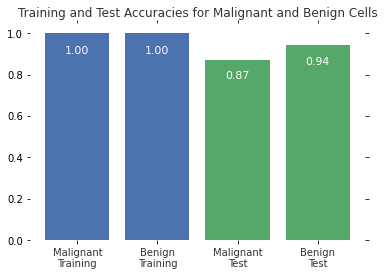

In [20]:
accuracy_plot()